In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, List

def plot_channel_metrics(
    metrics_array: np.ndarray,
    save_dir: str = "./results/metrics_plots",
    mode: str = "subplots",
    channel_names: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    figsize: tuple = (12, 6),
    dpi: int = 300,
    format: str = "png"
) -> None:
    """
    可视化通道指标数据（支持分通道子图/同图叠加模式）

    参数:
        metrics_array : np.ndarray - 形状为 (3, N) 的指标数据数组
        save_dir      : str        - 结果保存目录（默认：'./results/metrics_plots'）
        mode          : str        - 绘图模式：'subplots'（分通道子图）或 'combined'（同图叠加）
        channel_names : List[str] - 通道名称列表（长度3，默认：['Channel 0', 'Channel 1', 'Channel 2']）
        colors        : List[str] - 各通道颜色代码列表（长度3）
        figsize       : tuple      - 画布尺寸 (宽, 高)
        dpi           : int        - 图像分辨率（默认300）
        format        : str        - 图像格式（默认'png'）

    返回:
        None (结果图保存至指定目录)
    """
    # 参数校验
    assert metrics_array.ndim == 2 and metrics_array.shape[0] == 3, \
        "输入数据形状需为 (3, N)"
    assert mode in ["subplots", "combined"], \
        "模式需为 'subplots' 或 'combined'"
    
    # 设置默认参数
    if channel_names is None:
        channel_names = [f"Channel {i}" for i in range(3)]
    if colors is None:
        colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # matplotlib默认颜色
    
    # 创建保存目录
    os.makedirs(save_dir, exist_ok=True)
    
    # 根据模式绘图
    plt.ioff()  # 关闭交互模式
    if mode == "subplots":
        # 分通道子图模式
        fig, axes = plt.subplots(
            3, 1, 
            figsize=(figsize[0], figsize[1]*1.2),  # 增加高度适应子图
            sharex=True
        )
        fig.suptitle("Channel-wise Metrics Analysis", fontsize=14, y=1.02)
        
        for i, (ax, data, name, color) in enumerate(zip(axes, metrics_array, channel_names, colors)):
            ax.plot(data, color=color, linewidth=1.2, label=name)
            ax.set_ylabel("Value", fontsize=10)
            ax.legend(loc="upper right")
            ax.grid(True, linestyle="--", alpha=0.6)
            ax.set_xlim(0, len(data)-1)
            
        plt.xlabel("Sample Index", fontsize=12)
        plt.tight_layout()
        
    else:
        # 同图叠加模式
        plt.figure(figsize=figsize)
        for i, (data, name, color) in enumerate(zip(metrics_array, channel_names, colors)):
            plt.plot(data, color=color, linewidth=1.0, label=name)
            
        plt.title("Channel Metrics Comparison", fontsize=14)
        plt.xlabel("Sample Index", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.legend(loc="upper right", framealpha=0.9)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.xlim(0, metrics_array.shape[1]-1)
        plt.tight_layout()
    plt.show()

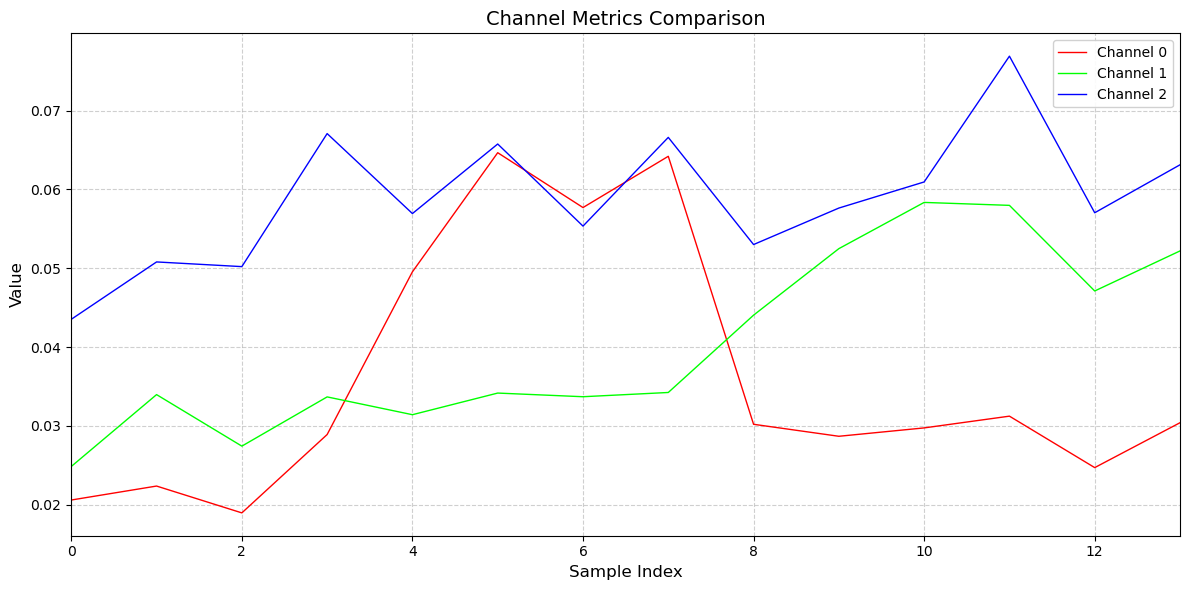

In [2]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/rmse.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )

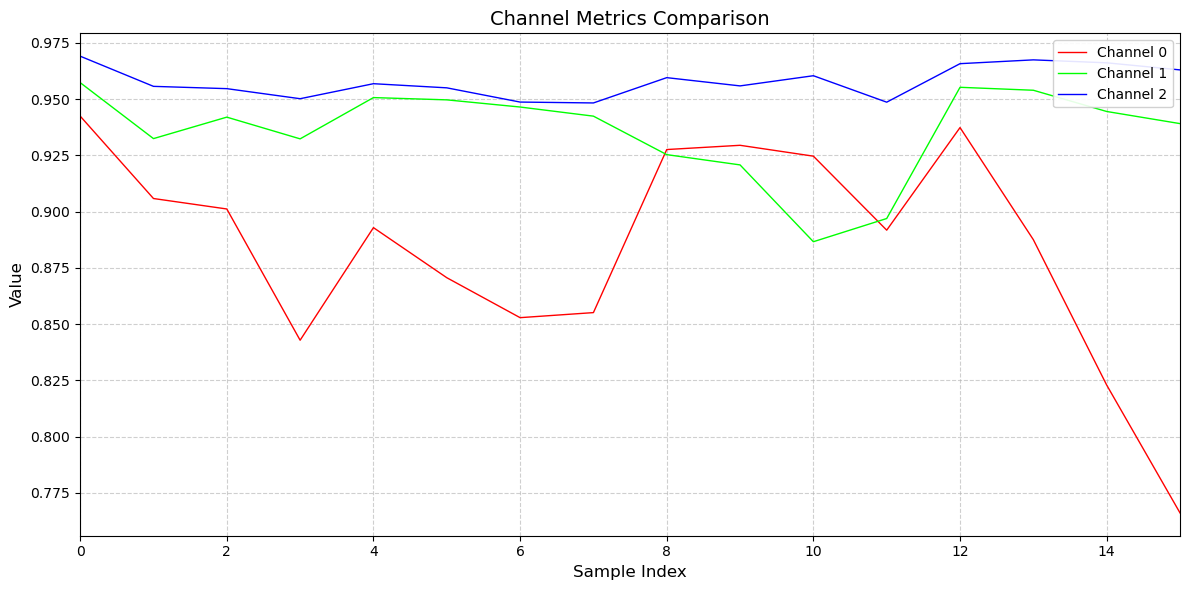

In [7]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/r2.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )

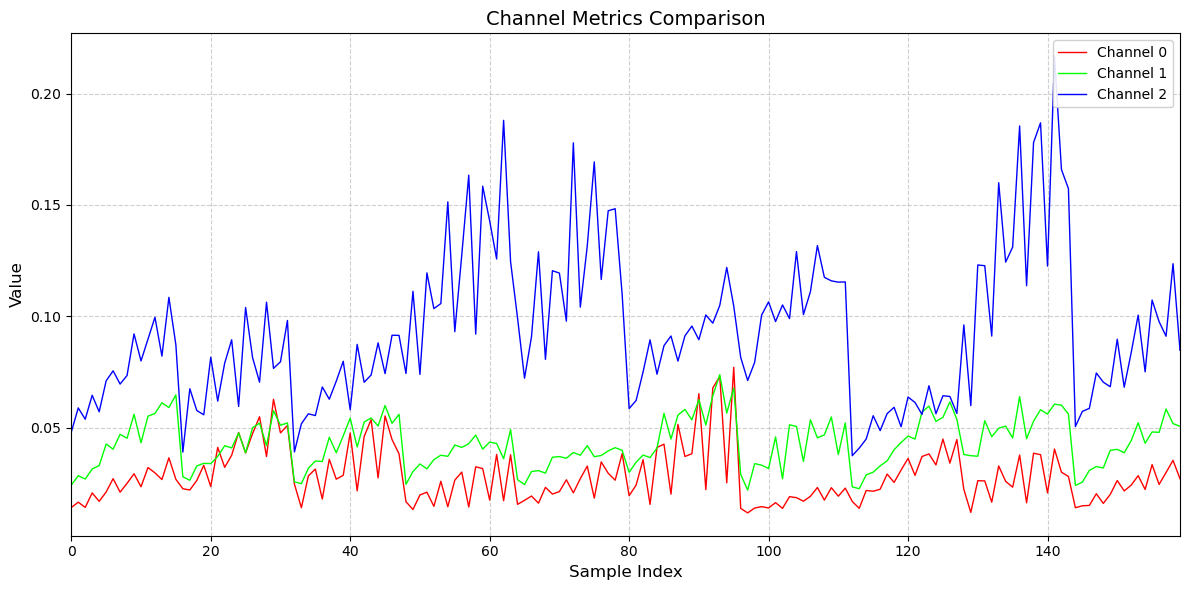

In [3]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/rmse.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )

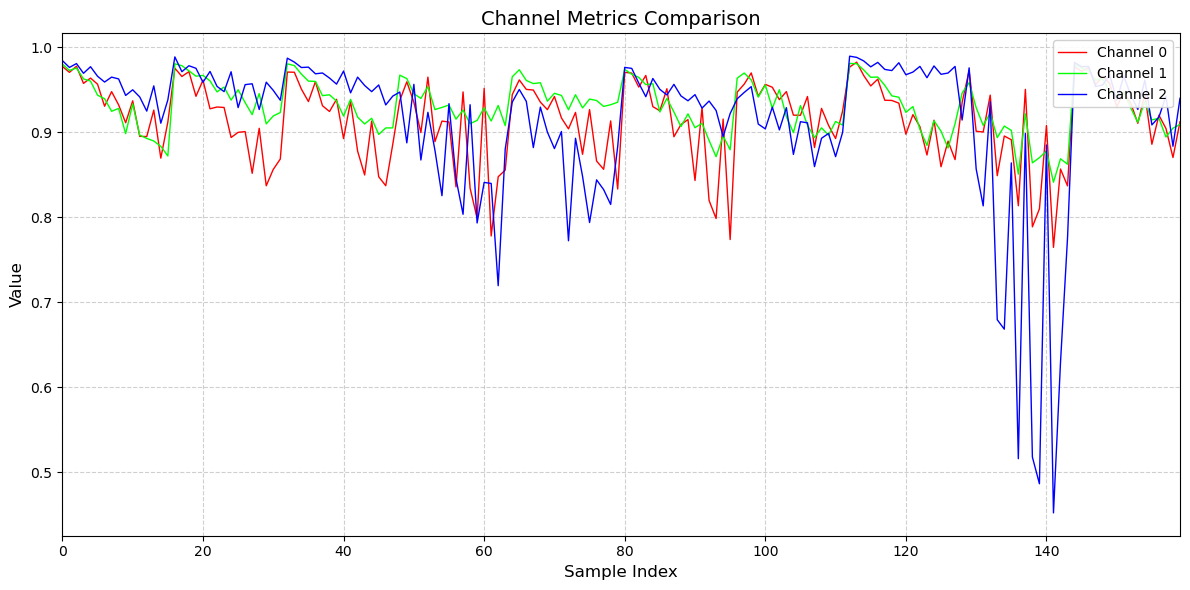

In [4]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/r2.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )

In [3]:
ground_truth=np.load("./results/data/true.npy")
predicted=np.load("./results/data/pred.npy")

In [4]:
ground_truth.shape

(140, 128, 128, 3)

In [7]:
predicted.shape

(1600, 128, 128, 3)

In [5]:
ground_truth[0:3, 60:65, 60:65, 0]

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)

In [6]:
predicted[0:3, 60:65, 60:65, 0]  # 选择前5个样本，60-65的区域，第0通道

array([[[0.0009094 , 0.00531818, 0.00081507, 0.00104192, 0.00174244],
        [0.00322896, 0.00641375, 0.00122714, 0.00790509, 0.        ],
        [0.        , 0.        , 0.00225691, 0.00236286, 0.00106171],
        [0.00263835, 0.00012301, 0.00140454, 0.        , 0.00233764],
        [0.00453209, 0.00156354, 0.00305531, 0.        , 0.00115306]],

       [[0.00083321, 0.00547674, 0.00037813, 0.00130878, 0.00192062],
        [0.00335705, 0.00669947, 0.00134541, 0.00837391, 0.        ],
        [0.        , 0.        , 0.00242085, 0.00221018, 0.00114947],
        [0.00285992, 0.        , 0.00137279, 0.        , 0.00243548],
        [0.00466738, 0.00138633, 0.00287035, 0.        , 0.00122937]],

       [[0.00116319, 0.00563426, 0.        , 0.0016655 , 0.00255814],
        [0.00292922, 0.00698828, 0.00182172, 0.00859699, 0.        ],
        [0.        , 0.        , 0.0032007 , 0.00268818, 0.00147284],
        [0.00365271, 0.        , 0.00128472, 0.        , 0.00278169],
        [0.00479

In [7]:
predicted_transposed = np.transpose(predicted, (0, 3, 1, 2))
ground_truth_transposed=np.transpose(ground_truth, (0, 3, 1, 2))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rmse_per_time(predictions, ground_truths, channel):
    """
    计算每个时间点的 RMSE（每个点在时间维度上计算）。

    参数：
    - predictions: 4D NumPy 数组，形状为 [时间, 通道, X, Y]
    - ground_truths: 4D NumPy 数组，形状为 [时间, 通道, X, Y]
    - channel: int，指定通道索引

    返回：
    - time_rmse: 一维数组，表示每个时间点的 RMSE 值
    """
    # 提取当前通道数据
    pred = predictions[:, channel, :]
    truth = ground_truths[:, channel, :, :]

    # 将 0 替换为 NaN，避免无效数据对计算的影响
    pred[pred == 0] = np.nan
    truth[truth == 0] = np.nan

    # 初始化用于存储每个时间点的 RMSE
    time_rmse = []
    # 对每个时间点计算 RMSE
    for t in range(pred.shape[0]):
        pred_c = pred[t, :, :]
        truth_c = truth[t,:, :]

        # 对于方向（dirm1, dirm2），需要计算周期差异 (0-360) 之间的最小差异
        if channel == 2 :  # dirm1 或 dirm2
            diff = np.minimum(np.abs(pred_c - truth_c), 360 - np.abs(pred_c - truth_c))  # 计算周期最小差异
        else:
            diff = np.abs(pred_c - truth_c)  # 对于其他通道，直接计算差异
        
        squared_error = diff ** 2  # 计算平方误差

        total_valid_points = np.sum(~np.isnan(squared_error))  # 非 NaN 点数

        # 计算 RMSE 并归一化
        if total_valid_points > 0:
            mse = np.nansum(squared_error) / total_valid_points
            rmse = np.sqrt(mse)
        else:
            rmse = np.nan
        
        time_rmse.append(rmse)

    return np.array(time_rmse)

def plot_rmse_over_time(predictions, ground_truths):

     # 预定义颜色列表
    colors = ['b', 'g', 'r']  # 蓝色、绿色、红色、青色

    # 创建一个 4 行 1 列的子图，绘制 4 个通道的 RMSE
    fig, axes = plt.subplots(3, 1, figsize=(12, 8))  # 调整高度，确保上下排列
    channel_name=['Hs','Tm','dirm']
    for channel in range(3):  # 对每个通道绘制
        # 计算每个时间点的 RMSE
        time_rmse = calculate_rmse_per_time(predictions, ground_truths, channel)

        # 绘制 RMSE 折线图
        axes[channel].plot(time_rmse, label=f"RMSE - Channel {channel_name[channel]}", color=colors[channel])
        axes[channel].set_title(f"RMSE Over Time - Channel {channel} ({channel_name[channel]})", fontsize=14)
        axes[channel].set_xlabel("Time Step")
        axes[channel].set_ylabel("RMSE")
        axes[channel].legend()
        axes[channel].grid(True)
        # 设置 y 轴从 0 开始
        axes[channel].set_ylim(0, np.max(time_rmse) + 0.1)  # +0.1 给 y 轴上限留点空白
    plt.tight_layout()  # 自动调整布局，防止子图重叠
    plt.show()

In [10]:
def average_by_groups(data, group_size):
    """
    对 NumPy 数据按第一维度每 group_size 个元素分组，计算分组内的平均值。

    参数：
        data (np.ndarray): 输入数据，形状为 (N, C, H, W)。
        group_size (int): 每组的大小。

    返回：
        np.ndarray: 计算分组平均值后的数据，形状为 (N // group_size, C, H, W)。
    """
    if data.shape[0] % group_size != 0:
        raise ValueError(f"第一维度长度 {data.shape[0]} 不是 group_size {group_size} 的整数倍，无法分组。")

    # 计算新的形状
    grouped_shape = (data.shape[0] // group_size, group_size, *data.shape[1:])

    # 重塑数据并计算平均值
    grouped_data = data.reshape(grouped_shape)
    averaged_data = grouped_data.mean(axis=1)  # 在第二维度上求平均值

    return averaged_data

In [11]:
predictions_day=average_by_groups(predicted_transposed, 1)
ground_truths_day=average_by_groups(ground_truth_transposed, 1)

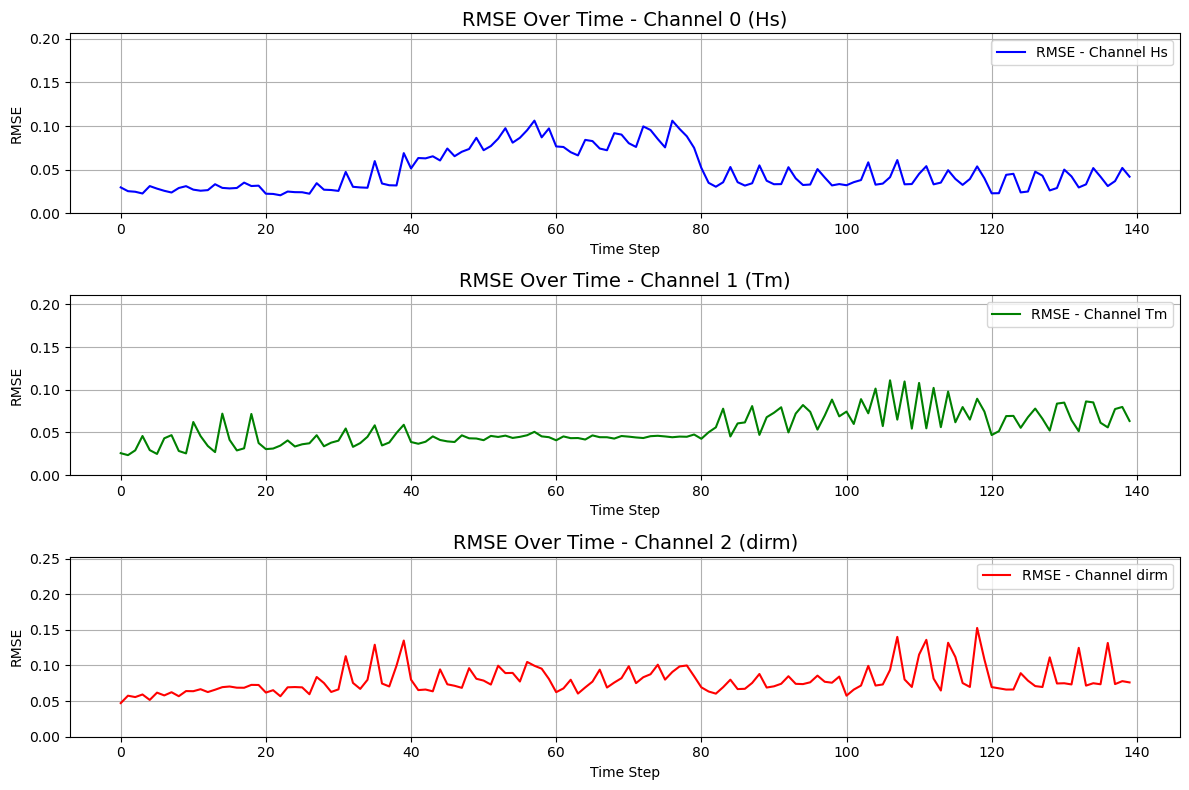

In [12]:
plot_rmse_over_time(predictions_day, ground_truths_day)

In [13]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_hs(predictions, ground_truths, feature_name, channel_idx=0):
    """
    绘制预测和真实值的均值图以及它们的差异图。

    参数：
    - predictions: 4D NumPy 数组，形状为 [时间, 通道, X, Y]
    - ground_truths: 4D NumPy 数组，形状为 [时间, 通道, X, Y]
    - feature_name: 字符串，表示特征的名称
    - channel_idx: 整数，表示通道索引（默认值为0）

    输出：
    - 生成预测、真实值均值图以及差异图
    """
    # 提取指定通道的 hs 数据
    hs_predictions = predictions[:, channel_idx, :, :]
    hs_ground_truths = ground_truths[:, channel_idx, :, :]

    # 将 0 替换为 NaN
    hs_predictions[hs_predictions == 0] = np.nan
    hs_ground_truths[hs_ground_truths == 0] = np.nan

     # 定义安全的均值计算函数
    def safe_nanmean(data, axis):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            return np.nanmean(data, axis=axis)

    # 计算均值
    hs_mean_predictions = safe_nanmean(hs_predictions, axis=0)
    hs_mean_ground_truths = safe_nanmean(hs_ground_truths, axis=0)

    # 计算差异（取绝对值）
    hs_mean_difference = np.abs(hs_mean_predictions - hs_mean_ground_truths)

    # 绘制图像
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))

    # 左图：预测均值
    im1 = axes[0].imshow(hs_mean_predictions, cmap='viridis', origin='lower', aspect='auto')
    axes[0].set_title(f"Mean {feature_name} - Predictions", fontsize=14)
    axes[0].set_xlabel("Grid X")
    axes[0].set_ylabel("Grid Y")
    fig.colorbar(im1, ax=axes[0], label=f"Mean {feature_name}")

    # 中图：真实值均值
    im2 = axes[1].imshow(hs_mean_ground_truths, cmap='viridis', origin='lower', aspect='auto')
    axes[1].set_title(f"Mean {feature_name} - Ground Truths", fontsize=14)
    axes[1].set_xlabel("Grid X")
    axes[1].set_ylabel("Grid Y")
    fig.colorbar(im2, ax=axes[1], label=f"Mean {feature_name}")

    # 右图：差异图
    im3 = axes[2].imshow(hs_mean_difference, cmap='viridis', origin='lower', aspect='auto')
    axes[2].set_title(f"Difference in {feature_name}", fontsize=14)
    axes[2].set_xlabel("Grid X")
    axes[2].set_ylabel("Grid Y")
    fig.colorbar(im3, ax=axes[2], label=f"Absolute Difference ({feature_name})")

    # 显示图像
    plt.tight_layout()
    plt.show()

In [14]:
# 找出array1中值为0的位置索引，返回的是一个元组，每个元素对应相应维度的索引数组
zero_indices = np.where(ground_truth == 0)

# 根据索引将array2中对应位置的元素变为0
predicted[zero_indices] = 0

In [15]:
predicted_transposed = np.transpose(predicted, (0, 3, 1, 2))
ground_truth_transposed=np.transpose(ground_truth, (0, 3, 1, 2))

In [47]:
predicted_transposed[0:3, 0, 60:65, 60:65]

array([[[3.9564213e-03, 3.0463099e-04,           nan,           nan,
         5.9780612e-04],
        [1.1075462e-03, 9.9893764e-04,           nan,           nan,
         1.9136996e-03],
        [7.9266349e-04, 7.4044894e-04, 1.9040005e-04, 2.3107463e-03,
         1.2827700e-04],
        [9.0766908e-04, 1.4062650e-03, 1.0428729e-03, 2.2043467e-03,
         4.3404222e-04],
        [2.2892219e-03, 1.7560396e-03,           nan,           nan,
                   nan]],

       [[4.0121754e-03, 3.8880689e-04,           nan,           nan,
         6.2833668e-04],
        [1.1264550e-03, 1.2050229e-03,           nan,           nan,
         1.9197632e-03],
        [8.9123769e-04, 4.8191095e-04, 4.0019111e-04, 2.5499826e-03,
         1.2591227e-04],
        [1.1801184e-03, 1.6563077e-03, 1.1842158e-03, 2.2337192e-03,
         4.2577935e-04],
        [2.4479746e-03, 1.8119777e-03,           nan,           nan,
                   nan]],

       [[4.1509429e-03, 3.3169101e-05,           nan,   

In [48]:
ground_truth_transposed[0:3, 0, 60:65, 60:65]

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]]], dtype=float32)

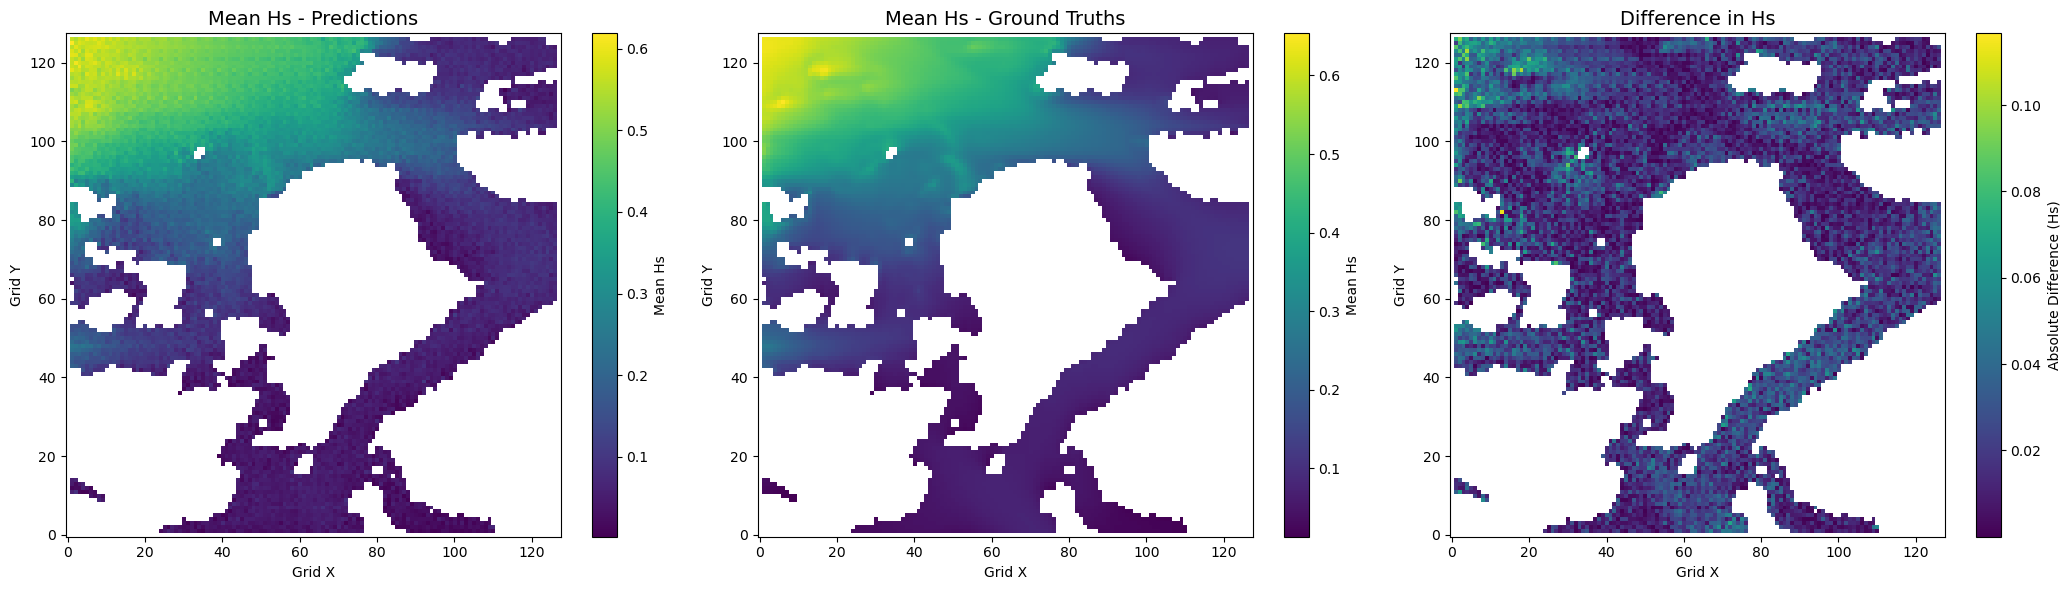

In [18]:
plot_mean_hs(predicted_transposed, ground_truth_transposed, feature_name="Hs", channel_idx=0)

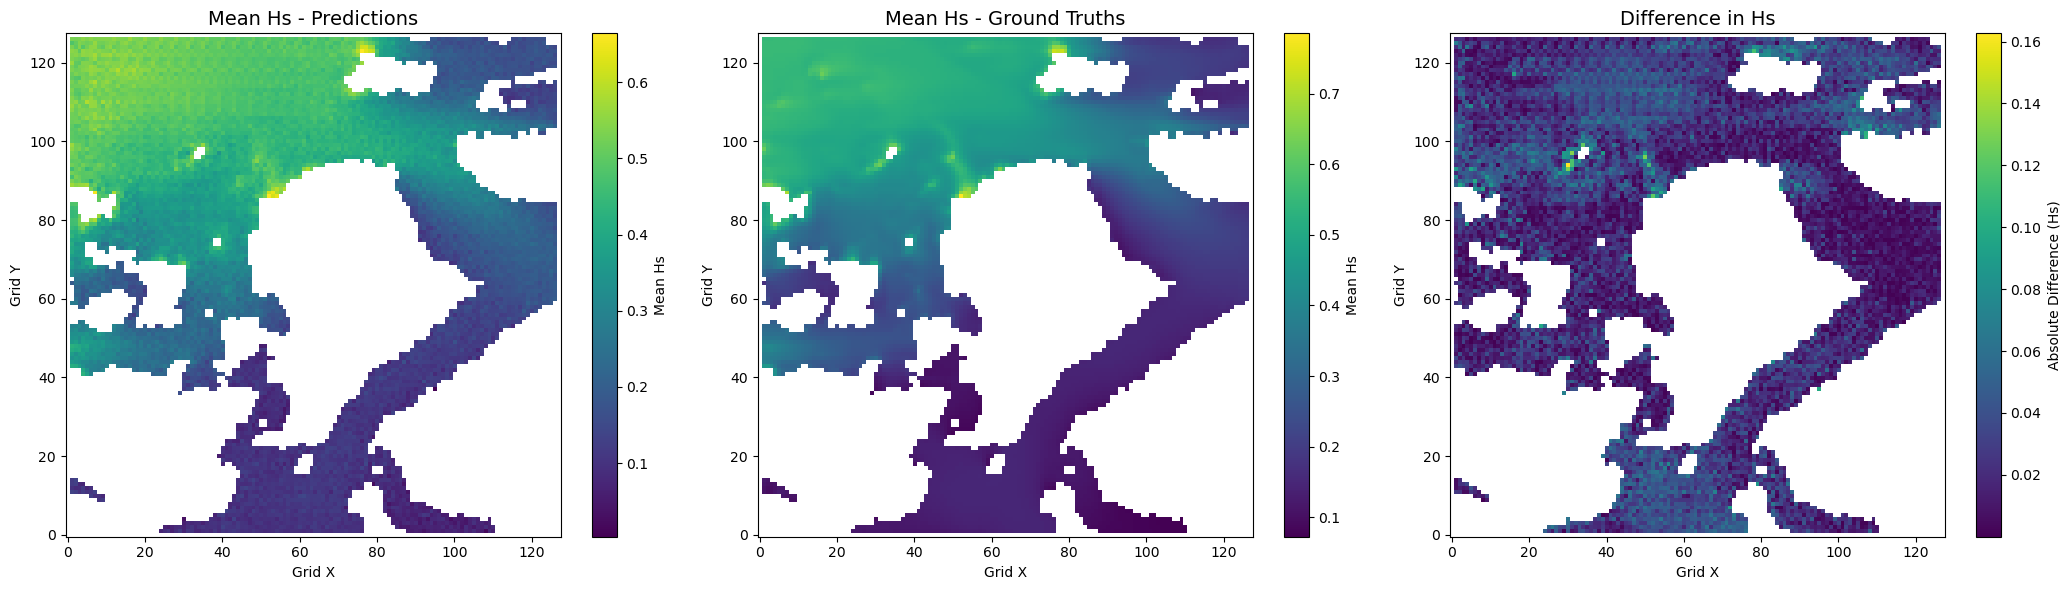

In [16]:
plot_mean_hs(predicted_transposed, ground_truth_transposed, feature_name="Hs", channel_idx=1)

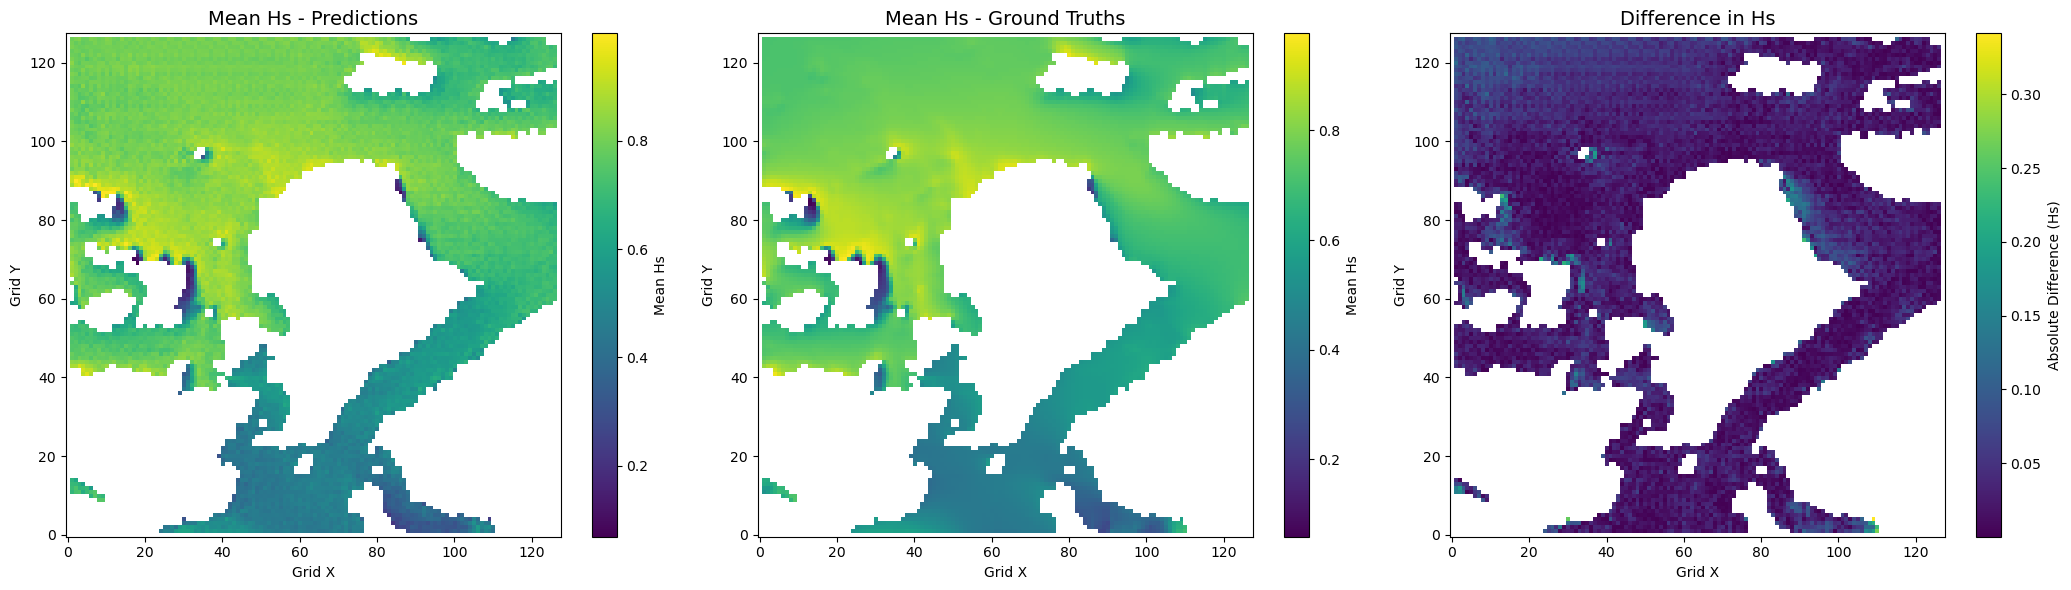

In [17]:
plot_mean_hs(predicted_transposed, ground_truth_transposed, feature_name="Hs", channel_idx=2)